<a href="https://colab.research.google.com/github/Haeune-Jeon/CV/blob/main/3_%EC%9D%B4%EB%AF%B8%EC%A7%80_%ED%8C%8C%EC%9D%BC%EC%9D%98_%EB%B3%80%ED%99%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os ,sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/pytest_img/mnist_jpg'

# 해당 폴더 내에서 파일에 해당하는 것들의 목록을 구한다 (isfile: 지금 읽고 있는 것이 파일이니?)
files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder,f))]

print(files)
print("Working with {0} images".format(len(files)))

['img_2_ (1).jpg', 'img_0_ (4).jpg', 'img_2_ (2).jpg', 'img_2_ (6).jpg', 'img_0_ (1).jpg', 'img_1_ (5).jpg', 'img_0_ (8).jpg', 'img_1_ (8).jpg', 'img_0_ (2).jpg', 'img_2_ (10).jpg', 'img_2_ (4).jpg', 'img_0_ (9).jpg', 'img_1_ (10).jpg', 'img_0_ (3).jpg', 'img_1_ (3).jpg', 'img_1_ (7).jpg', 'img_1_ (1).jpg', 'img_0_ (7).jpg', 'img_1_ (2).jpg', 'img_1_ (9).jpg', 'img_2_ (5).jpg', 'img_1_ (6).jpg', 'img_0_ (6).jpg', 'img_0_ (10).jpg', 'img_0_ (5).jpg', 'img_1_ (4).jpg', 'img_2_ (3).jpg', 'img_4_ (5).jpg', 'img_4_ (8).jpg', 'img_2_ (7).jpg', 'img_4_ (6).jpg', 'img_3_ (10).jpg', 'img_3_ (8).jpg', 'img_2_ (8).jpg', 'img_4_ (3).jpg', 'img_5_ (1).jpg', 'img_3_ (7).jpg', 'img_3_ (2).jpg', 'img_3_ (3).jpg', 'img_5_ (2).jpg', 'img_4_ (9).jpg', 'img_3_ (6).jpg', 'img_5_ (3).jpg', 'img_4_ (1).jpg', 'img_5_ (10).jpg', 'img_2_ (9).jpg', 'img_4_ (2).jpg', 'img_4_ (7).jpg', 'img_3_ (1).jpg', 'img_5_ (4).jpg', 'img_3_ (9).jpg', 'img_4_ (4).jpg', 'img_3_ (4).jpg', 'img_3_ (5).jpg', 'img_4_ (10).jpg', 'im

In [ ]:
# 처음 두 개만 출력
for i in range(0,2):
  print(files[i])
  display(_Imgdis(filename=folder + "/" + files[i], width=30, height=40))

img_2_ (1).jpg


img_0_ (4).jpg


In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

file_names = []  # 파일 이름 전체를 저장할 리스트
file_labels = []  # 라벨을 저장할 리스트

# 파일 이름으로부터 라벨 부분만 추출하여 file_labels 리스트에 저장한다
for _file in files:
  file_names.append(_file)  # file 이름을 file_names 리스트에 계속 추가됨
  label_start = _file.find("_")+1  # 라벨의 시작 위치 (4)
  label_end = _file.find("_ (")     # 라벨의 끝 위치 (5)
  file_labels.append(int(_file[label_start:label_end]))  # 라벨을 file_labels 리스트에 추가

print("Files in folder: %d" % len(file_names))

Files in folder: 100


In [ ]:
print(file_labels)

[2, 0, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 2, 4, 4, 2, 4, 3, 3, 2, 4, 5, 3, 3, 3, 5, 4, 3, 5, 4, 5, 2, 4, 4, 3, 5, 3, 4, 3, 3, 4, 6, 5, 7, 6, 7, 7, 6, 7, 6, 7, 6, 7, 6, 6, 6, 5, 7, 5, 5, 8, 7, 5, 7, 8, 7, 6, 6, 9, 9, 9, 9, 8, 8, 9, 9, 8, 9, 9, 8, 8, 9, 8, 8, 9, 8]


In [ ]:
os. chdir(folder)

# 한 개의 파일을 로드한다
img = load_img(file_names[0])
print("Original:", type(img))

# PIL 파일을 넘파이 배열로 변환
img_array = img_to_array(img)

print("Numpy array info:")
print(type(img_array))
print("type:", img_array.dtype)
print("shape:", img_array.shape)  # (height, width, channel = 28,28,3)

Original: <class 'PIL.Image.Image'>
Numpy array info:
<class 'numpy.ndarray'>
type: float32
shape: (28, 28, 3)


In [ ]:
image_height = img_array.shape[0]   # 28
image_width = img_array.shape[1]    # 28
channels = img_array.shape[2]  # 3

dataset = np.ndarray(shape=(len(file_names), image_height, image_width, channels), dtype=np.int32)
print(dataset.shape)

(100, 28, 28, 3)


In [ ]:
for count, item in enumerate(file_names):  #file_names 배열에서 인덱스 0부터 시작해서 인덱스 하나씩 올라가면서 반복문 돌아감
  img = load_img(file_names[count])   # PIL 타입의 image
  img_array = img_to_array(img)   # numpy 타입으로 바꿈
  img_array = img_array.reshape(28,28,3)
  dataset[count] = img_array  # dataset에 변환한 데이터 넣어주기

  if count % 5000 == 0:
    print("%d images to array" % count)

print("모든 이미지가 배열로 변환되었습니다!")

0 images to array
모든 이미지가 배열로 변환되었습니다!


In [ ]:
# 한 개 이미지 파일의 변환 결과 확인
print(dataset.shape)
print(file_labels[40])   # 종속변수

display(_Imgdis(filename=folder + "/" + file_names[40], width=30, height=40))

np.set_printoptions(linewidth=np.inf)   # 너비를 최대한으로 늘림
print(dataset[40,:,:,0])

(100, 28, 28, 3)
4


[[  0   0   0   0   0   0   0   0   0   3   6   4   0   7   0   5   0   5   8   0   0   4   7   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0  11   0   4   0   1   0   0   0   5   0   0   5   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2  16   5   0   2   2   8   3  13   3   0   9   6   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0  11   1   0   0   0   9   0   0   0   3   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  19   0  12   5   0  25   2  12   0   2  10   1   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0  19   0  12   0 118 226 117   0   1   0   1   0   0  37  62   9   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  25   0 113 233 255 188   0   0   0  22   0  16 179 236  94   0   0   0   0]
 [  0   0   0   0   0   0   0   0   8   0  16 230 251 236  42   7  14   0   3   0  10 206 255  90   0   0   0   0]
 [  0   4   1   0   0   1   0   0   1   3   2 220 255 111   0   3   1  11   0   

In [ ]:
# 훈련 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

# 데이터가 충분히 많으면 층화추출을 하지 않아도 자연스럽게 골고루 분배가 된다. 하지만, 데이터가 적으면 한쪽으로 종속변수 종류가 쏠릴 수 있으므로 이때는 층화추출을 해주는 것이 좋다.
train_images, test_iamges, train_labels, test_labels = train_test_split(dataset, file_labels, test_size=0.2, stratify=file_labels)   # stratify 뒤에는 종속변수 옴.  ///
print("Train set size: {0}, Test set size: {1}".format(len(train_images), len(test_images)))

Train set size: 80, Test set size: 20


In [ ]:
# 모델 설계
from keras import models
from keras import layers
import numpy as np

model = models.Sequential()
model.add(layers.Input(shape=(28,28,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,200,458 (4.58 MB)

 Trainable params: 1,200,458 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

# 데이터 reshape 및 스케일링
print("before:", train_images.shape)

train_images = train_images.reshape((len(train_images), 28, 28, 3))
train_images = train_images.astype('float32') / 255   # 0~1 사이의 값으로 정규화

test_images = test_iamges.reshape((len(test_images), 28, 28, 3))
test_images = test_images.astype('float32') / 255   # 정규화

print("after:", train_images.shape)

before: (80, 28, 28, 3)
after: (80, 28, 28, 3)


In [ ]:
# 라벨 원-핫 인코딩
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
test_labels

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
# 모델 훈련
history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - acc: 0.1250 - loss: 2.4268 - val_acc: 0.3500 - val_loss: 2.1476
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - acc: 0.4672 - loss: 1.8545 - val_acc: 0.4500 - val_loss: 1.7419
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - acc: 0.6594 - loss: 1.0321 - val_acc: 0.4000 - val_loss: 1.5509
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - acc: 0.8148 - loss: 0.7987 - val_acc: 0.7500 - val_loss: 1.0595
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - acc: 0.9547 - loss: 0.3198 - val_acc: 0.7000 - val_loss: 1.1183


In [ ]:
# 성능 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_acc:", test_acc)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print("Validation Accuracy of each epoch:", val_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - acc: 0.7000 - loss: 1.1183
test_acc: 0.699999988079071
Validation Accuracy of each epoch: [0.3499999940395355, 0.44999998807907104, 0.4000000059604645, 0.75, 0.699999988079071]


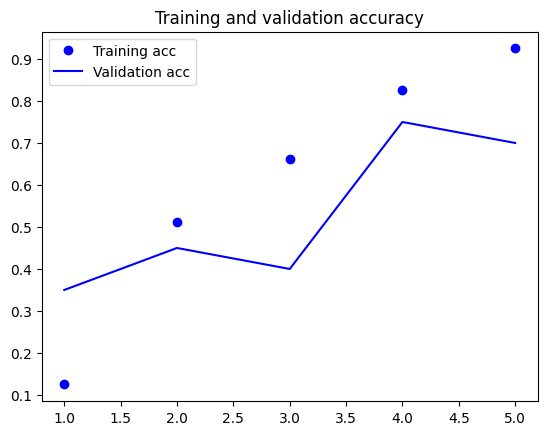

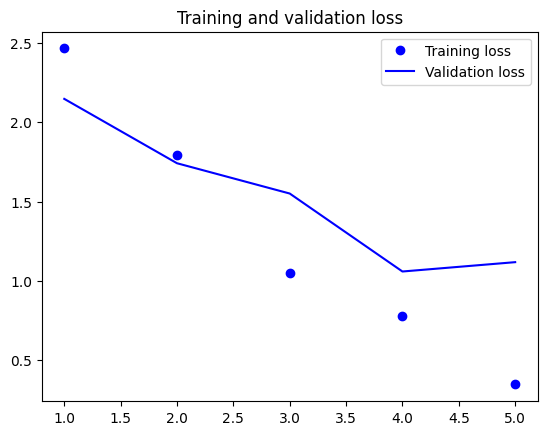

In [ ]:
# 그래프 확인
import matplotlib.pyplot as plt
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt. show()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Cats and Dogs

In [ ]:
folder = '/content/drive/MyDrive/pytest_img/cats_dogs'
files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder,f))]
print("Working with {0} images".format(len(files)))

Working with 60 images


cat.2.jpg


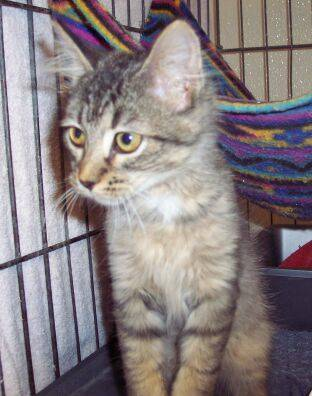

cat.24.jpg


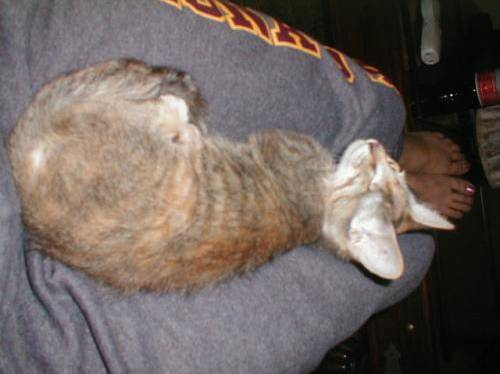

In [ ]:
# 이미지 확인

# 처음 두 개만 출력
for i in range(0,2):
  print(files[i])  # 파일명 출력
  display(_Imgdis(filename=folder + "/" + files[i], width=120, height=160))

In [ ]:
# 이미지 라벨 추출
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
file_names = []   # 파일명 저장을 위한 빈 리스트 생성
file_labels = []  # 파일 labels 저장을 위한 빈 리스트 생성

for _file in files:
  file_names.append(_file)    # 파일 이름 저장
  label_start = 0             # 라벨의 시작 위치
  label_end = _file.find(".") # 라벨의 끝 위치
  label_str = _file[label_start:label_end]   # 라벨 추출 (-> cat 혹은 dog 이 세 개의 음절을 갖고오게 됨)

# 파일 이름이 cat이면 0, dog이면 1로 변환하여 저장 (이진 분류이기 때문에 원-핫 인코딩이 필요 없음)
  if label_str == "cat":
    file_labels.append(0)
  elif label_str == "dog":
    file_labels.append(1)
  else:
    print("Error!")

  print("Files in folder: %d" %len(file_names))

Files in folder: 1
Files in folder: 2
Files in folder: 3
Files in folder: 4
Files in folder: 5
Files in folder: 6
Files in folder: 7
Files in folder: 8
Files in folder: 9
Files in folder: 10
Files in folder: 11
Files in folder: 12
Files in folder: 13
Files in folder: 14
Files in folder: 15
Files in folder: 16
Files in folder: 17
Files in folder: 18
Files in folder: 19
Files in folder: 20
Files in folder: 21
Files in folder: 22
Files in folder: 23
Files in folder: 24
Files in folder: 25
Files in folder: 26
Files in folder: 27
Files in folder: 28
Files in folder: 29
Files in folder: 30
Files in folder: 31
Files in folder: 32
Files in folder: 33
Files in folder: 34
Files in folder: 35
Files in folder: 36
Files in folder: 37
Files in folder: 38
Files in folder: 39
Files in folder: 40
Files in folder: 41
Files in folder: 42
Files in folder: 43
Files in folder: 44
Files in folder: 45
Files in folder: 46
Files in folder: 47
Files in folder: 48
Files in folder: 49
Files in folder: 50
Files in 

In [ ]:
# shape 확인 -> 이미지마다 shape가 제각각임
# PIL 파일을 넘파이 배열로 변환하기

os.chdir(folder)  # 경로변경

# 한개의 파일을 로드한다
img = load_img(file_names[0])
print("Original:", type(img))  # PIL 형태

# PIL 파일을 넘파일 배열로 변환
img_array = img_to_array(img)

print("Numpy array info:")
print(type(img_array))
print("type:", img_array.dtype)
print("shsape:", img_array.shape)

Original: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Numpy array info:
<class 'numpy.ndarray'>
type: float32
shsape: (396, 312, 3)


In [ ]:
# 다른 한개의 파일을 로드한다
img = load_img(file_names[1])
print("Original:", type(img))  # PIL 형태

# PIL 파일을 넘파일 배열로 변환
img_array = img_to_array(img)

print("Numpy array info:")
print(type(img_array))
print("type:", img_array.dtype)
print("shsape:", img_array.shape)

Original: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Numpy array info:
<class 'numpy.ndarray'>
type: float32
shsape: (374, 500, 3)


In [ ]:
# 이미지 shape 통일
# 모든 이미지의 size를 20*20에 맞추기로 한다

image_height = 20
image_width = 20
channels = 3

# (batch_size, 20, 20, 3)을 담을 수 있는 dataset 변수 준비 (batch_size는 전체 데이터 개수)
dataset = np.ndarray(shape=(len(file_names), image_height, image_width, channels), dtype=np.int32)

print(dataset.shape)

(60, 20, 20, 3)


In [ ]:
# 새 디렉토리 생성
# 사이즈가 조절된 이미지를 저장할 디렉토리를 생성한다
import os

if not os.path.exists(os.path.join(folder,'new/')):
  os.makedirs(os.path.join(folder,'new/'))  # 만약에 new 디렉토리가 없으면, new 디렉토리를 만들어라

In [ ]:
# 모든 파일 크기 조절 (PIL 파일에 대하여 resize()로 크기를 변경)
# reshape()는 실제 데이트 크기를 변경하는 것이 아닌, batich_size만 변경하지만, resize()는 데이터의 크기를 변경
from PIL import Image

for count, item in enumerate(file_names):
  img = load_img(file_names[count])
  img = img.resize((20,20), Image.Resampling.LANCZOS)
  img.save(fp=os.path.join(folder,'new/'+file_names[count]))

In [ ]:
# (크기 조절된 파일을)넘파일 배열로 변환
for count, item in enumerate(file_names):
  img = load_img(os.path.join(folder,'new/')+file_names[count])
  img_array = img_to_array(img)
  dataset[count] = img_array

  if count % 500 == 0:
    print(f"{count} images to array")

print("모든 이미지가 배열로 변환되었습니다")

0 images to array
모든 이미지가 배열로 변환되었습니다


In [ ]:
# 변환 결과 이미지 확인
print(dataset.shape)
print(file_labels[30])

display(_Imgdis(filename=os.path.join(folder,'new') + "/" + files[30], width=100, height=100))

(60, 20, 20, 3)
1


In [ ]:
# 변환 결과 넘파이 배열 확인
np.set_printoptions(linewidth=np.inf)
print(dataset[30,:,:,0])   # 30번째 파일의 첫 번째 channel

[[123 137 119 142 100  45 101 131 126 151 132 140 149 122 134 152 137 135 134 134]
 [148 164 161 153 156 175 166 103  85 103 103 112 133 143 139 119 134 133 132 132]
 [191 163 190 195 179 189 167 125 161  85  64  85 108 136 144 136 132 130 131 130]
 [177 194 173 177 199 126 109 252 190  74  55  69  61  87 116 141 130 129 130 130]
 [186 174 166 174 121  54 125 255 113  65  90  83  41  60  95 116 131 131 130 129]
 [176 178 175 165  88  40 135 252 134  87  88  90  62  57  80 107 132 132 131 130]
 [186 149 196 169  63  94 204 248 224 153  87  86  78  44  53  88 132 132 131 130]
 [192 186 196  90  45 139 181 186 254 236 156 119  99  54  51  65 130 131 130 130]
 [187 203 200  92 121 142  40 123 227 255 251 173 198  96  75  83 114 139 120 140]
 [197 197 223 138 120 148  95 131 225 225 227 220 225  81  51  97 130 156 131 134]
 [210 191 193 142 135 176 160 167 214 218 224 229 222 135 130 169 144 174 144 128]
 [196 208 210 207 235 237 203 204 220 240 236 225 206 198 222 231 190 219 195 162]
 [20

In [ ]:
# 훈련 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(dataset, file_labels, test_size=0.2, stratify=file_labels)
print("Train set size: {0}, Test set size: {1}".format(len(train_images), len(test_images)))

Train set size: 48, Test set size: 12


In [ ]:
# 모델 설계
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np

model = models.Sequential()
model.add(layers.Input(shape=(20,20,3)))
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))   # 이진분류 -> 출력층 1개, 활성화함수 = sigmoid

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 18, 18, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 543,937 (2.07 MB)

 Trainable params: 543,937 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

# 데이터 reshape 및 스케일링
print("before:", train_images.shape)

train_images = train_images.reshape((len(train_images),20,20,3))
train_images = train_images.astype('float32')/255  # 데이터 정규화

test_images = test_images.reshape((len(test_images),20,20,3))
test_images = test_images.astype('float32')/255  # 데이터 정규화

print("after:", train_images.shape)

before: (48, 20, 20, 3)
after: (48, 20, 20, 3)


In [ ]:
# 데이터 확인
train_images

array([[[[6.15148019e-06, 5.78962863e-06, 2.17111074e-06],
         [6.69425799e-06, 6.33240597e-06, 2.71388831e-06],
         [6.99580096e-06, 6.75456658e-06, 3.07574010e-06],
         ...,
         [1.07952446e-05, 1.12174048e-05, 8.08135701e-06],
         [1.07349360e-05, 1.11570962e-05, 8.02104842e-06],
         [1.07349360e-05, 1.11570962e-05, 8.02104842e-06]],

        [[7.84012263e-06, 7.47827016e-06, 3.85975272e-06],
         [7.90043123e-06, 7.53857876e-06, 3.92006132e-06],
         [7.05611001e-06, 6.81487518e-06, 3.13604869e-06],
         ...,
         [1.10967876e-05, 1.15189487e-05, 8.38289998e-06],
         [1.09761704e-05, 1.13983306e-05, 8.26228279e-06],
         [1.09158618e-05, 1.13380220e-05, 8.20197420e-06]],

        [[8.98598682e-06, 8.68444295e-06, 5.18654224e-06],
         [1.07952446e-05, 1.04937017e-05, 6.99580096e-06],
         [1.16998744e-05, 1.13983306e-05, 7.90043123e-06],
         ...,
         [1.10967876e-05, 1.15189487e-05, 8.38289998e-06],
         [

In [ ]:
# 넘파이 배열로 변환
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
# 모델 훈련
history = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - acc: 0.5000 - loss: 0.6931 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - acc: 0.5208 - loss: 0.6932 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - acc: 0.5417 - loss: 0.6929 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - acc: 0.5417 - loss: 0.6933 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - acc: 0.5417 - loss: 0.6930 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - acc: 0.4792 - loss: 0.6937 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - acc: 0.5000 - loss: 0.6932 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - acc: 0.4167 - loss: 0.6936 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - acc: 0.5000 - loss: 0.6

In [ ]:
# 성능 평가
print("Test Data Accuracy:", model.evaluate(test_images, test_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.5000 - loss: 0.6931
Test Data Accuracy: [0.6931480765342712, 0.5]


In [ ]:
# 예측 결과
model.predict(test_images)   # predict(독립변수) -> 예측값 나옴

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[0.4999066 ],
       [0.49990976],
       [0.4999106 ],
       [0.49990714],
       [0.49990672],
       [0.4999053 ],
       [0.49990654],
       [0.49990916],
       [0.49990934],
       [0.499909  ],
       [0.49991193],
       [0.49990717]], dtype=float32)

In [ ]:
# 정확도 확인
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuraacy of each epoch:', acc)
print()
print('Validation Accuracy of each epoch:', val_acc)

Accuraacy of each epoch: [0.5, 0.5208333134651184, 0.5416666865348816, 0.5416666865348816, 0.5416666865348816, 0.4791666567325592, 0.5, 0.4166666567325592, 0.5, 0.3333333432674408, 0.5208333134651184, 0.5416666865348816, 0.4375, 0.5625, 0.5625, 0.4166666567325592, 0.4583333432674408, 0.4583333432674408, 0.3333333432674408, 0.3958333432674408, 0.5625, 0.4583333432674408, 0.5625, 0.4583333432674408, 0.625, 0.5625, 0.4583333432674408, 0.5625, 0.3541666567325592, 0.5, 0.4375, 0.5208333134651184, 0.5, 0.4375, 0.4791666567325592, 0.4375, 0.5416666865348816, 0.5625, 0.5208333134651184, 0.5, 0.5, 0.5625, 0.4583333432674408, 0.5833333134651184, 0.3541666567325592, 0.5625, 0.5, 0.4375, 0.5416666865348816, 0.6458333134651184]

Validation Accuracy of each epoch: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

In [ ]:
# 손실값 확인
print('Loss of each epoch:', np.round(loss,3))
print()
print('Validation Loss of each epoch:', np.round(val_loss,3))

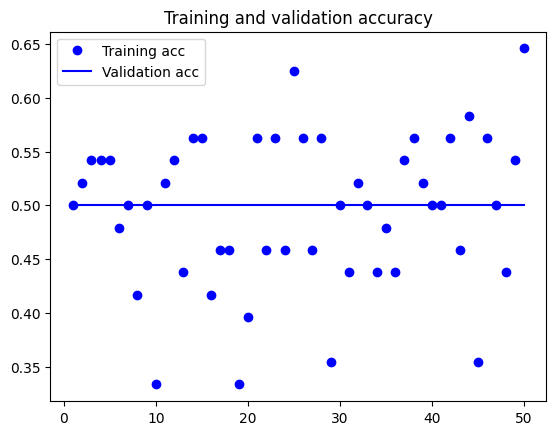

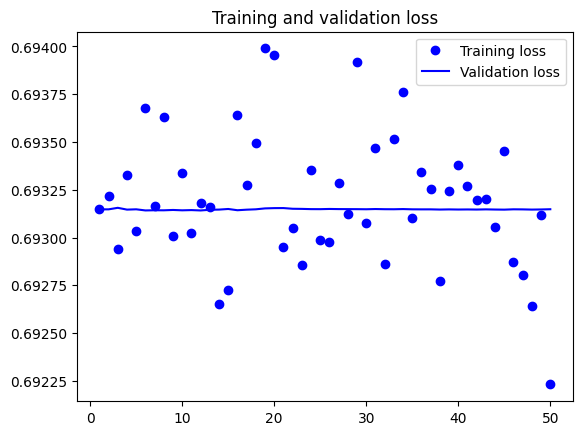

In [ ]:
# 그래프 확인
import matplotlib.pyplot as plt

epochs = range(1, len(val_acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()